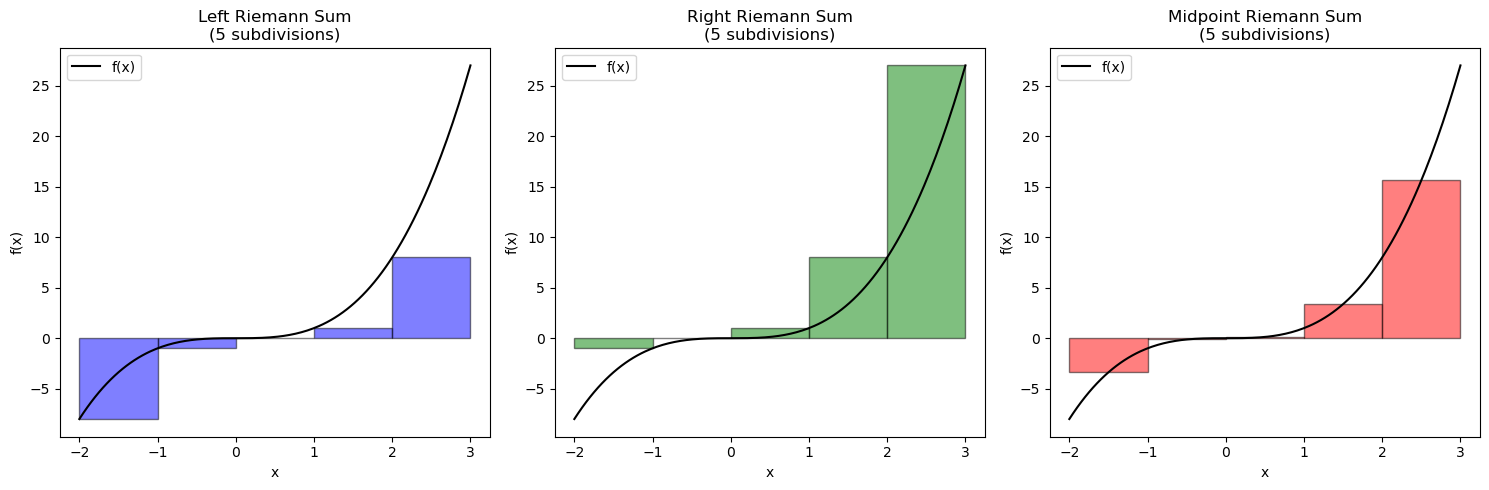

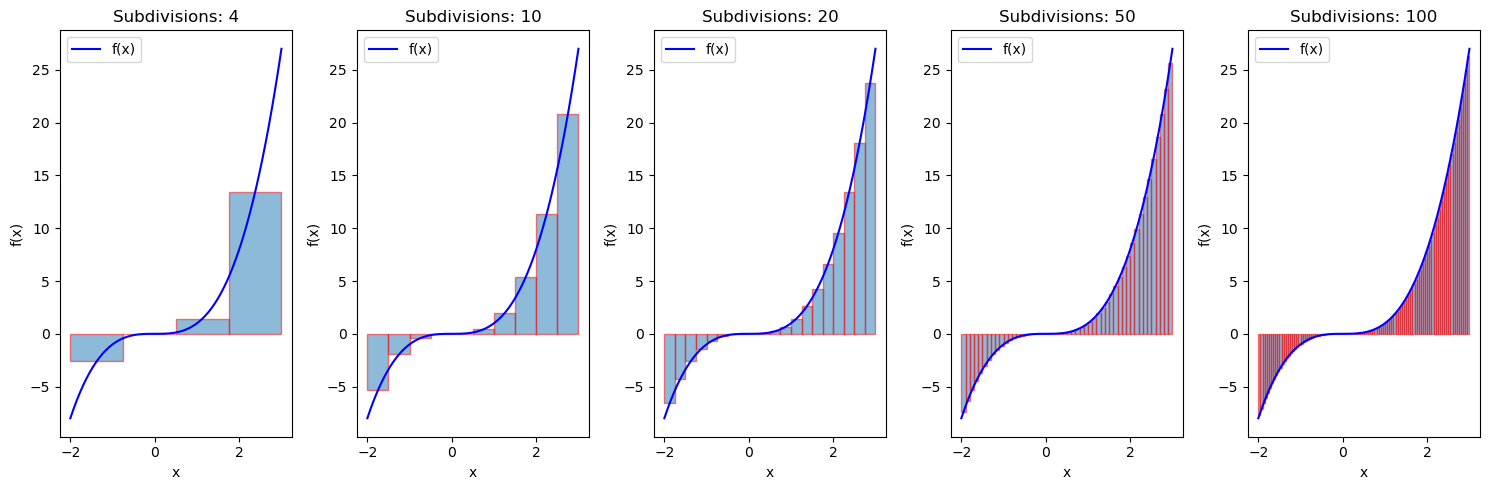

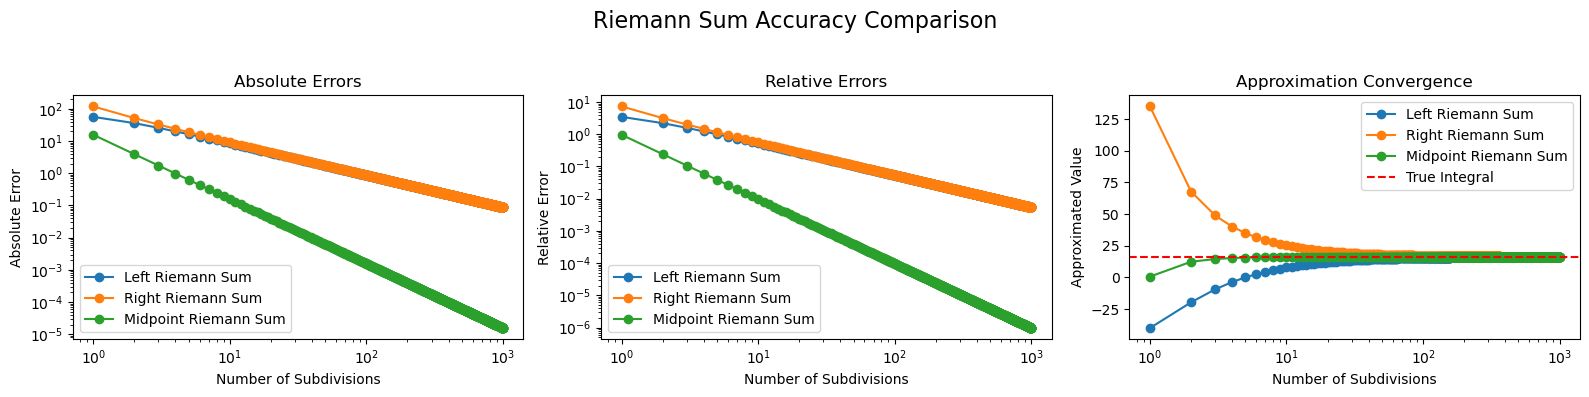

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    """Example function for Riemann sum demonstration."""
    return x**3  # Quadratic function

def riemann_sum(func, a, b, n, mode='left'):
    """
    Calculate Riemann sum with selectable mode.
    Modes: 'left', 'right', 'midpoint'
    """
    dx = (b - a) / n
    
    if mode == 'left':
        x = np.linspace(a, b - dx, n)
    elif mode == 'right':
        x = np.linspace(a + dx, b, n)
    elif mode == 'midpoint':
        x = np.linspace(a + dx/2, b - dx/2, n)
    else:
        raise ValueError("Invalid mode. Choose 'left', 'right', or 'midpoint'.")
    
    return np.sum(func(x) * dx)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def plot_riemann_sum_types(func, a, b, n):
    """
    Plot Left, Right, and Midpoint Riemann sum rectangles
    """
    plt.figure(figsize=(15, 5))
    x_continuous = np.linspace(a, b, 200)
    
    # Calculation parameters
    dx = (b - a) / n
    
    # Plotting methods with explicit rectangle positioning
    rectangle_methods = [
        ('Left', lambda i: a + i * dx, 'blue', 'edge'),
        ('Right', lambda i: a + (i + 1) * dx, 'green', 'edge'),
        ('Midpoint', lambda i: a + (i + 0.5) * dx, 'red', 'center')
    ]
    
    for idx, (method, x_pos_func, color, align) in enumerate(rectangle_methods, 1):
        plt.subplot(1, 3, idx)
        
        # Plot continuous function
        plt.plot(x_continuous, func(x_continuous), 'k-', label='f(x)')
        
        # Plot rectangles with correct positioning
        for i in range(n):
            x_start = x_pos_func(i)
            rect_height = func(x_start)
            
            # Set alignment and position correctly for rectangles
            if method == 'Left':
                plt.bar(x_start, rect_height, width=dx, alpha=0.5, 
                        edgecolor='k', color=color, align='edge')
            elif method == 'Right':
                plt.bar(x_start, rect_height, width=dx, alpha=0.5, 
                        edgecolor='k', color=color, align='edge')
            elif method == 'Midpoint':
                plt.bar(x_start, rect_height, width=dx, alpha=0.5, 
                        edgecolor='k', color=color, align='center')
        
        plt.title(f'{method} Riemann Sum\n({n} subdivisions)')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def plot_riemann_sum_types(func, a, b, n):
    """
    Plot Left, Right, and Midpoint Riemann sum rectangles
    """
    plt.figure(figsize=(15, 5))
    x_continuous = np.linspace(a, b, 200)
    
    # Calculation parameters
    dx = (b - a) / n
    
    # Plotting methods with explicit rectangle positioning
    rectangle_methods = [
        ('Left', lambda i: a + i * dx, 'blue', 'edge'),
        ('Right', lambda i: a + (i + 1) * dx, 'green', 'edge'),
        ('Midpoint', lambda i: a + (i + 0.5) * dx, 'red', 'center')
    ]
    
    for idx, (method, x_pos_func, color, align) in enumerate(rectangle_methods, 1):
        plt.subplot(1, 3, idx)
        
        # Plot continuous function
        plt.plot(x_continuous, func(x_continuous), 'k-', label='f(x)')
        
        # Plot rectangles with correct positioning
        for i in range(n):
            x_start = x_pos_func(i)
            rect_height = func(x_start)
            
            # Set alignment and position correctly for rectangles
            if method == 'Left':
                plt.bar(x_start, rect_height, width=dx, alpha=0.5, 
                        edgecolor='k', color=color, align='edge')
            elif method == 'Right':
                plt.bar(x_start, rect_height, width=dx, alpha=0.5, 
                        edgecolor='k', color=color, align='edge')
            elif method == 'Midpoint':
                plt.bar(x_start, rect_height, width=dx, alpha=0.5, 
                        edgecolor='k', color=color, align='center')
        
        plt.title(f'{method} Riemann Sum\n({n} subdivisions)')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

def plot_riemann_accuracy_grid(func, a, b, n_values, scale = 'log'):
    """
    Create a plot showing Riemann sum absolute and relative errors for different modes
    """
    true_integral, _ = quad(func, a, b)  # Calculate the true integral

    plt.figure(figsize=(16, 4))
    plt.suptitle('Riemann Sum Accuracy Comparison', fontsize=16)

    modes = ['left', 'right', 'midpoint']
    all_absolute_errors = {}
    all_relative_errors = {}

    for mode in modes:
        absolute_errors = []
        relative_errors = []

        for n in n_values:
            approx = riemann_sum(func, a, b, n, mode)
            abs_error = abs(true_integral - approx)
            rel_error = abs_error / abs(true_integral)

            absolute_errors.append(abs_error)
            relative_errors.append(rel_error)

        all_absolute_errors[mode] = absolute_errors
        all_relative_errors[mode] = relative_errors

    # Plot absolute errors for all modes
    plt.subplot(1, 3, 1)
    for mode in modes:
        plt.plot(n_values, all_absolute_errors[mode], marker='o', label=f'{mode.capitalize()} Riemann Sum')

    plt.title('Absolute Errors')
    plt.xlabel('Number of Subdivisions')
    plt.ylabel('Absolute Error')
    plt.xscale(scale)
    plt.yscale(scale)
    plt.legend()

    # Plot relative errors for all modes
    plt.subplot(1, 3, 2)
    for mode in modes:
        plt.plot(n_values, all_relative_errors[mode], marker='o', label=f'{mode.capitalize()} Riemann Sum')

    plt.title('Relative Errors')
    plt.xlabel('Number of Subdivisions')
    plt.ylabel('Relative Error')
    plt.xscale(scale)
    plt.yscale(scale)
    plt.legend()

    # Plot approximation convergence
    plt.subplot(1, 3, 3)
    for mode in modes:
        approximations = [riemann_sum(func, a, b, n, mode) for n in n_values]
        plt.plot(n_values, approximations, marker='o', label=f'{mode.capitalize()} Riemann Sum')

    plt.axhline(y=true_integral, color='r', linestyle='--', label='True Integral')
    plt.title('Approximation Convergence')
    plt.xlabel('Number of Subdivisions')
    plt.ylabel('Approximated Value')
    plt.xscale(scale)
    plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def plot_riemann_sum_rectangles(func, a, b, n_values):
    """
    Create a grid of Riemann sum rectangle approximations
    """
    plt.figure(figsize=(15, 5))
    x_continuous = np.linspace(a, b, 200)
    
    for idx, n in enumerate(n_values, 1):
        plt.subplot(1, len(n_values), idx)
        
        # Plot continuous function
        plt.plot(x_continuous, func(x_continuous), 'b-', label='f(x)')
        
        # Calculate Riemann sum rectangles
        dx = (b - a) / n
        x_left = np.linspace(a + dx/2, b - dx/2, n)
        
        # Plot rectangles
        plt.bar(x_left, func(x_left), width=dx, alpha=0.5, edgecolor='r')
        
        plt.title(f'Subdivisions: {n}')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

def plot_riemann_sum_types(func, a, b, n):
    """
    Plot Left, Right, and Midpoint Riemann sum rectangles
    """
    plt.figure(figsize=(15, 5))
    x_continuous = np.linspace(a, b, 200)
    
    # Calculation parameters
    dx = (b - a) / n
    
    # Plotting methods with explicit rectangle positioning
    rectangle_methods = [
        ('Left', lambda i: a + i * dx, 'blue', 'edge'),
        ('Right', lambda i: a + (i + 1) * dx, 'green', 'edge'),
        ('Midpoint', lambda i: a + (i + 0.5) * dx, 'red', 'center')
    ]
    
    for idx, (method, x_pos_func, color, align) in enumerate(rectangle_methods, 1):
        plt.subplot(1, 3, idx)
        
        # Plot continuous function
        plt.plot(x_continuous, func(x_continuous), 'k-', label='f(x)')
        
        # Plot rectangles with correct positioning
        for i in range(n):
            x_start = x_pos_func(i)
            rect_height = func(x_start)
            
            # Set alignment and position correctly for rectangles
            if method == 'Left':
                plt.bar(x_start, rect_height, width=dx, alpha=0.5, 
                        edgecolor='k', color=color, align='edge')
            elif method == 'Right':
                plt.bar(x_start - dx, rect_height, width=dx, alpha=0.5, 
                        edgecolor='k', color=color, align='edge')
            elif method == 'Midpoint':
                plt.bar(x_start, rect_height, width=dx, alpha=0.5, 
                        edgecolor='k', color=color, align='center')
        
        plt.title(f'{method} Riemann Sum\n({n} subdivisions)')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Demonstrate Riemann sum rectangle types
plot_riemann_sum_types(f, -2, 3, 5)

# Demonstrate Riemann sum rectangles
plot_riemann_sum_rectangles(f, -2, 3, [4, 10, 20, 50, 100])

# Demonstrate Riemann sums with accuracy grid
plot_riemann_accuracy_grid(f, -2, 3, range(1,1000,1), scale= 'log')

